### Visualizing the history of the ebola Epidemic

**Note** : 
This is last year's exercise analyzing the spread of Ebola. The outbreak has been contained now, nonetheless we will analyze the history of the spread for the 3 of the countries found below. (You can perform uptodate analysis as well, by changing the dates to 2015 and cutting down the csv content limit to 100 instead of 1000)


The data is available in [this site](http://apps.who.int/gho/data/view.ebola-sitrep.ebola-summary-latest?lang=en) and they provie a restful api to download the data in csv formats. you can download up to date data about the ebola epidemic. We will download the numbers pertaining to cumulative cases and cumulative deaths for the dates as given in the question and generate graphs to visualize them.

In [1]:
import pandas as pd
import requests
import lxml.html as lh
from datetime import date, timedelta as td
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
base_url='http://apps.who.int/gho/athena/xmart/data-verbose.csv?'+\
    'target=EBOLA_MEASURE/CASES,DEATHS&profile=verbose&'+\
    'filter=COUNTRY:GIN;COUNTRY:UNSPECIFIED;COUNTRY:LBR;COUNTRY:UNSPECIFIED;'+\
    'COUNTRY:SLE;COUNTRY:UNSPECIFIED;LOCATION:-;'+\
    'DATAPACKAGEID:{0};INDICATOR_TYPE:SITREP_CUMULATIVE;'+\
    'INDICATOR_TYPE:SITREP_CUMULATIVE_21_DAYS;'

In [3]:

import pandas as pd
import requests
from datetime import date, timedelta as td

d1 = date(2014,11,1)
d2 = date(2014,12,5)
delta = d2 - d1

DF={}
for i in range(delta.days + 1):
    D=str(d1 + td(days=i))
    url= base_url.format(D)
    csv=requests.get(url)
    if len(csv.content) > 1000:
        DF[D]=(pd.DataFrame.from_csv(url))
#         x = pd.DataFrame.from_csv(url)
        print '"%s"'%D,len(csv.content), DF[D].shape
#         read the content of csv.content into DF[lD]
#         DF[len(DF) -1]
#         break


"2014-11-12" 9369 (36, 22)
"2014-11-14" 8578 (24, 22)
"2014-11-19" 9466 (36, 22)
"2014-11-21" 8118 (24, 22)
"2014-11-26" 9829 (36, 22)
"2014-11-28" 5773 (24, 22)
"2014-12-01" 5929 (24, 22)
"2014-12-02" 5737 (24, 22)
"2014-12-03" 9702 (39, 22)
"2014-12-04" 6239 (26, 22)
"2014-12-05" 6231 (26, 22)


In [ ]:
#view frames
#print DF['2015-11-13']
print DF['2014-11-12'].keys()

In [10]:
###### SACHIN: YOU NEED TO RUN THIS CELL TWICE FOR SOME REASON, I WASNT ABLE TO FIGURE OUT WHY

Cols = None
DF_Combined=[0]
DF_Combined=pd.DataFrame()
print DF_Combined.shape
for k in DF.keys():
    if ['EPI_WEEK (CODE)'] in DF[k].columns.values:
        DF[k].rename(columns={'EPI_WEEK (CODE)':'EPI_DATE (CODE)',
                             'EPI_WEEK (DISPLAY)':'EPI_DATE (DISPLAY)',
                             'EPI_WEEK (URL)':'EPI_DATE (URL)'}
                                ,inplace=True)
    C=set(DF[k].columns)
    if Cols==None:
        Cols=C
    else:
        Cols= C & Cols# complete
print DF_Combined.shape
for k in DF.keys():
    df=DF[k]
    DF[k]=DF[k][DF[k]['INDICATOR_TYPE (DISPLAY)'] == 'Cumulative'] # Finish to restrict to  cumulative
    DF[k]=DF[k][DF[k]['CASE_DEFINITION (DISPLAY)'] == 'Confirmed']     # Finish to restrict to confirmed
    if DF_Combined.shape==(0,0):
        DF_Combined = pd.concat([df[[x for x in Cols]]])
    else:
        DF_Combined = pd.concat([DF_Combined[[x for x in Cols]],df[[x for x in Cols]]]) # concatanate df to DF_Combined
print k, DF_Combined.shape
print Cols, len(Cols), len(DF_Combined.columns)


(0, 0)
(0, 0)
2014-12-03 (66, 22)
set(['EPI_DATE (URL)', 'CASE_DEFINITION (DISPLAY)', 'Comments', 'Low', 'EBOLA_MEASURE (CODE)', 'EBOLA_MEASURE (DISPLAY)', 'CASE_DEFINITION (URL)', 'INDICATOR_TYPE (CODE)', 'DATAPACKAGEID (URL)', 'Display Value', 'INDICATOR_TYPE (DISPLAY)', 'DATAPACKAGEID (DISPLAY)', 'COUNTRY (DISPLAY)', 'EPI_DATE (DISPLAY)', 'INDICATOR_TYPE (URL)', 'COUNTRY (URL)', 'EPI_DATE (CODE)', 'DATAPACKAGEID (CODE)', 'EBOLA_MEASURE (URL)', 'Numeric', 'High', 'CASE_DEFINITION (CODE)']) 22 22


In [13]:
#SACHIN: RUN THE CELL ABOVE TWICE FOR THIS CELL TO WORK
from datetime import datetime
# transform the dates into python date objects so that they can be compared and plotted.
dates = [datetime.strptime(x[:16], '%d %B %Y') for x in list(DF_Combined['EPI_DATE (DISPLAY)'].values)]
DF_Combined['date']=dates

In [14]:
# cols contains all of the columns we need in DF_Combined
cols=['COUNTRY (DISPLAY)',
 'EBOLA_MEASURE (DISPLAY)',
 'date',
 'Numeric']
cols

['COUNTRY (DISPLAY)', 'EBOLA_MEASURE (DISPLAY)', 'date', 'Numeric']

               COUNTRY (DISPLAY) EBOLA_MEASURE (DISPLAY)       date  Numeric
COUNTRY (CODE)                                                              
GIN                       Guinea         Number of cases 2014-11-09     1612
GIN                       Guinea         Number of cases 2014-11-11     1647
GIN                       Guinea         Number of cases 2014-11-16     1698
GIN                       Guinea         Number of cases 2014-11-18     1745
GIN                       Guinea         Number of cases 2014-11-23     1850
GIN                       Guinea         Number of cases 2014-11-25     1892
GIN                       Guinea         Number of cases 2014-11-28     1921
GIN                       Guinea         Number of cases 2014-11-30     1929
GIN                       Guinea         Number of cases 2014-11-30     1929
GIN                       Guinea         Number of cases 2014-12-02     1949
GIN                       Guinea         Number of cases 2014-12-03     1956

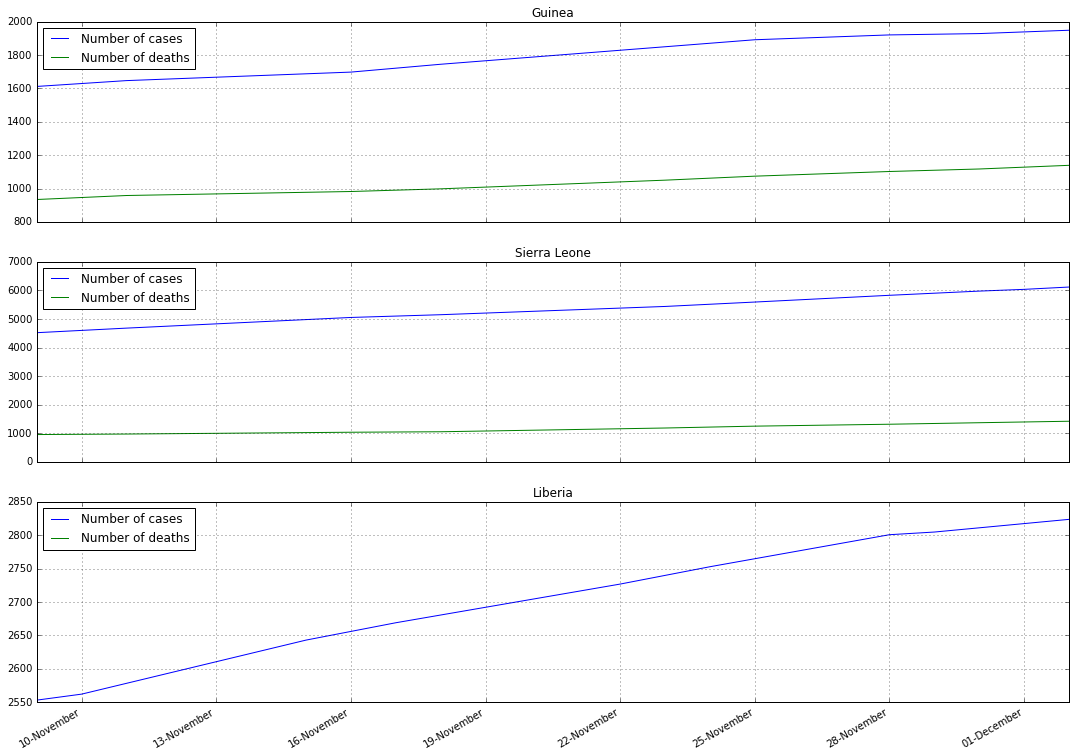

In [15]:
#Fill in the missing commands to create the plots given at the bottom.
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
myFmt = mdates.DateFormatter('%d-%B')


dff=DF_Combined[cols]
dff=dff.sort(columns=['COUNTRY (DISPLAY)','EBOLA_MEASURE (DISPLAY)','date'])
Countries=set(dff['COUNTRY (DISPLAY)'])
types=set(dff['EBOLA_MEASURE (DISPLAY)'])

# pd.DataFrame.dropna?

fig, axarr = plt.subplots(3,sharex=True)
fig.set_size_inches(18.5,13.5)  #there is a bug in this line
fig.autofmt_xdate()
x = axarr[0]
i=0
for C in Countries:
    for t in types:
        data=dff[(dff['COUNTRY (DISPLAY)']==C)&(dff['EBOLA_MEASURE (DISPLAY)']==t)]
        print data
        data[['date', 'Numeric']].plot(ax=axarr[i],
                                       x='date',
                                       y='Numeric',
                                       label=t,
                                       title=C
                                    )
    axarr[i].xaxis.set_major_formatter(myFmt)
    axarr[i].xaxis_date()
    axarr[i].set_xlabel('')
    # Use the country name as the title
    axarr[i].legend(loc='best')
    axarr[i].grid()
    i+=1